## Load Data

In [143]:
import pandas as pd

train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

## Data Preprocessing

In [144]:
train_data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [145]:
train_data.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [146]:
train_data.shape, test_data.shape

((140700, 20), (93800, 19))

In [147]:
train_y = train_data["Depression"]

### Combine both Train data & Test data into single dataframe for easier preprocessing & cleaning

In [148]:
df = pd.concat([train_data, test_data])
df.shape

(234500, 20)

In [149]:
df = df.rename(
    columns={
        "Have you ever had suicidal thoughts ?": "Suicidal Thoughts",
        "Family History of Mental Illness": "Family History"
    }
)

Working Professional or Student is redundant as we've the Profession column  
Updating Profession as Student for students.

In [150]:
df.loc[df["Working Professional or Student"] == "Student", "Profession"] = "Student"

In [151]:
df.isna()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Depression
0,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,True
93796,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,True
93797,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
93798,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,True


In [152]:
df["CGPA"].fillna(-1, inplace=True)
df["Degree"].fillna("Other", inplace=True)

/tmp/ipykernel_2490/4124504737.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CGPA"].fillna(-1, inplace=True)
/tmp/ipykernel_2490/4124504737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

Academic Pressure & Study Satisfaction are only available for Students, These can be update for Work Pressure & Job Satisfaction

In [153]:
df["Work Pressure"].fillna(df["Academic Pressure"], inplace=True)
df["Job Satisfaction"].fillna(df["Study Satisfaction"], inplace=True)

/tmp/ipykernel_2490/3374377853.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Work Pressure"].fillna(df["Academic Pressure"], inplace=True)
/tmp/ipykernel_2490/3374377853.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

Marking the features which have less than 5 examples to Other

In [154]:
def mark_value_as_other(feature: str, threshold: int, value_to_update: str = "Other"):
    print(f"Updating for Feature: {feature}")
    values = df[feature].value_counts()
    df[feature] = df[feature].replace(values[values < threshold].index, value_to_update)

for feature in ["Profession", "Degree", "City", "Dietary Habits"]:
    mark_value_as_other(feature=feature, threshold=5)

Updating for Feature: Profession
Updating for Feature: Degree
Updating for Feature: City
Updating for Feature: Dietary Habits


In [155]:
df.loc[df["Degree"] == "M"]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Depression
20659,20659,Nishant,Male,19.0,Kolkata,Student,Student,3.0,3.0,7.53,1.0,1.0,Less than 5 hours,Moderate,M,No,0.0,5.0,Yes,1.0
55299,55299,Shlok,Male,52.0,Meerut,Working Professional,Content Writer,NaN,3.0,-1.00,NaN,4.0,More than 8 hours,Healthy,M,No,7.0,5.0,No,0.0
111586,111586,Shrey,Male,43.0,Indore,Working Professional,NaN,NaN,2.0,-1.00,NaN,5.0,7-8 hours,Healthy,M,Yes,11.0,2.0,Yes,0.0
44486,185186,Aishwarya,Female,26.0,Ludhiana,Student,Student,4.0,4.0,5.64,3.0,3.0,More than 8 hours,Healthy,M,No,6.0,2.0,No,NaN
46769,187469,Vivan,Male,28.0,Nashik,Student,Student,4.0,4.0,8.91,1.0,1.0,5-6 hours,Healthy,M,Yes,6.0,3.0,No,NaN


Convert to Numeric values

In [156]:
df["Work/Study Hours"] = pd.to_numeric(df["Work/Study Hours"], errors="coerce")

In [157]:
df["Suicidal Thoughts"] = df["Suicidal Thoughts"].map({"Yes": 1, "No": 0})

In [158]:
df["Family History"] = df["Family History"].map({"No": 0, "Yes": 1})

In [159]:
df["Gender"] = df["Gender"].map({"Female": 0, "Male": 1})

In [160]:
df["Sleep Duration"] = df["Sleep Duration"].map({
    "3-4 hours": 4,
    "4-5 hours": 4,
    "Less than 5 hours": 4,
    "5-6 hours": 5,
    "6-7 hours": 6,
    "7-8 hours": 7,
    "More than 8 hours": 8
})

In [161]:
df['Dietary Habits'] = df['Dietary Habits'].map({
    "Unhealthy": -1,
    "Moderate": 0,
    "Healthy": 1,
})

Remove the columns which are not required

In [162]:
df = df.drop(["id", "Working Professional or Student", "Academic Pressure", "Study Satisfaction"], axis=1).reset_index(drop=True)

Mark whether Job is Desk type or Field Work

In [163]:
office_based = {
    'Chef': False,
    'Teacher': False,
    'Student': False,
    'Business Analyst': True,
    'Financial Analyst': True,
    'Chemist': False,
    'Electrician': False,
    'Software Engineer': True,
    'Data Scientist': True,
    'Plumber': False,
    'Marketing Manager': True,
    'Accountant': True,
    'Entrepreneur': True,  # can be True too
    'HR Manager': True,
    'UX/UI Designer': True,
    'Content Writer': True,
    'Educational Consultant': True,
    'Civil Engineer': False,
    'Manager': True,
    'Pharmacist': False,
    'Architect': True,
    'Mechanical Engineer': False,
    'Customer Support': True,
    'Consultant': True,
    'Judge': False,
    'Researcher': True,
    'Pilot': False,
    'Graphic Designer': True,
    'Travel Consultant': True,
    'Digital Marketer': True,
    'Lawyer': False, # can be True too
    'Research Analyst': True,
    'Sales Executive': True,
    'Doctor': False,
    'Unemployed': False,
    'Investment Banker': True,
    'Other': False,
    'Academic': True,
    'Working Professional': True
}
df["Desk Job"] = df["Profession"].map(office_based)

In [164]:
df.sample(10)

,Name,Gender,Age,City,Profession,Work Pressure,CGPA,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Depression,Desk Job
172745,Aarush,1,35.0,Bhopal,Entrepreneur,4.0,-1.00,2.0,8.0,-1.0,ME,0,7.0,4.0,0,NaN,True
138155,Rohan,1,27.0,Agra,Student,1.0,6.75,2.0,7.0,1.0,B.Tech,1,8.0,2.0,0,0.0,False
78250,Aarush,1,29.0,Agra,Student,2.0,8.04,3.0,5.0,-1.0,MSc,1,3.0,3.0,0,1.0,False
114338,Siddhi,0,19.0,Agra,NaN,3.0,-1.00,1.0,5.0,1.0,Class 12,0,10.0,4.0,0,1.0,NaN
82531,Ayaan,1,39.0,Kanpur,Software Engineer,1.0,-1.00,3.0,4.0,-1.0,MSc,1,10.0,4.0,1,0.0,True
101620,Chhavi,0,22.0,Pune,Student,5.0,8.94,5.0,8.0,0.0,M.Com,0,8.0,4.0,1,1.0,False
60671,Utkarsh,1,47.0,Chennai,Researcher,2.0,-1.00,1.0,4.0,0.0,BCA,0,1.0,2.0,1,0.0,True
159292,Pratyush,1,21.0,Ludhiana,Student,5.0,5.85,2.0,5.0,1.0,Class 12,0,10.0,5.0,1,NaN,False
193520,Mahika,0,56.0,Bangalore,Content Writer,3.0,-1.00,4.0,8.0,0.0,MCA,0,6.0,3.0,1,NaN,True
185207,Aarush,1,18.0,Ahmedabad,NaN,4.0,-1.00,1.0,5.0,0.0,Class 12,1,8.0,5.0,1,NaN,NaN


## Data Visualization

In [165]:
val = df["Dietary Habits"].value_counts()

val[val < 10].index

Index([], dtype='float64', name='Dietary Habits')

In [166]:
df.loc[df["Dietary Habits"] == "Other"]

,Name,Gender,Age,City,Profession,Work Pressure,CGPA,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Depression,Desk Job


/tmp/ipykernel_2490/1323143068.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(custom_tick_labels[column], rotation=45)  # Set custom tick labels
/tmp/ipykernel_2490/1323143068.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(custom_tick_labels[column], rotation=45)  # Set custom tick labels
/tmp/ipykernel_2490/1323143068.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(custom_tick_labels[column], rotation=45)  # Set custom tick labels
/tmp/ipykernel_2490/1323143068.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(custom_tick_labels[column], rot

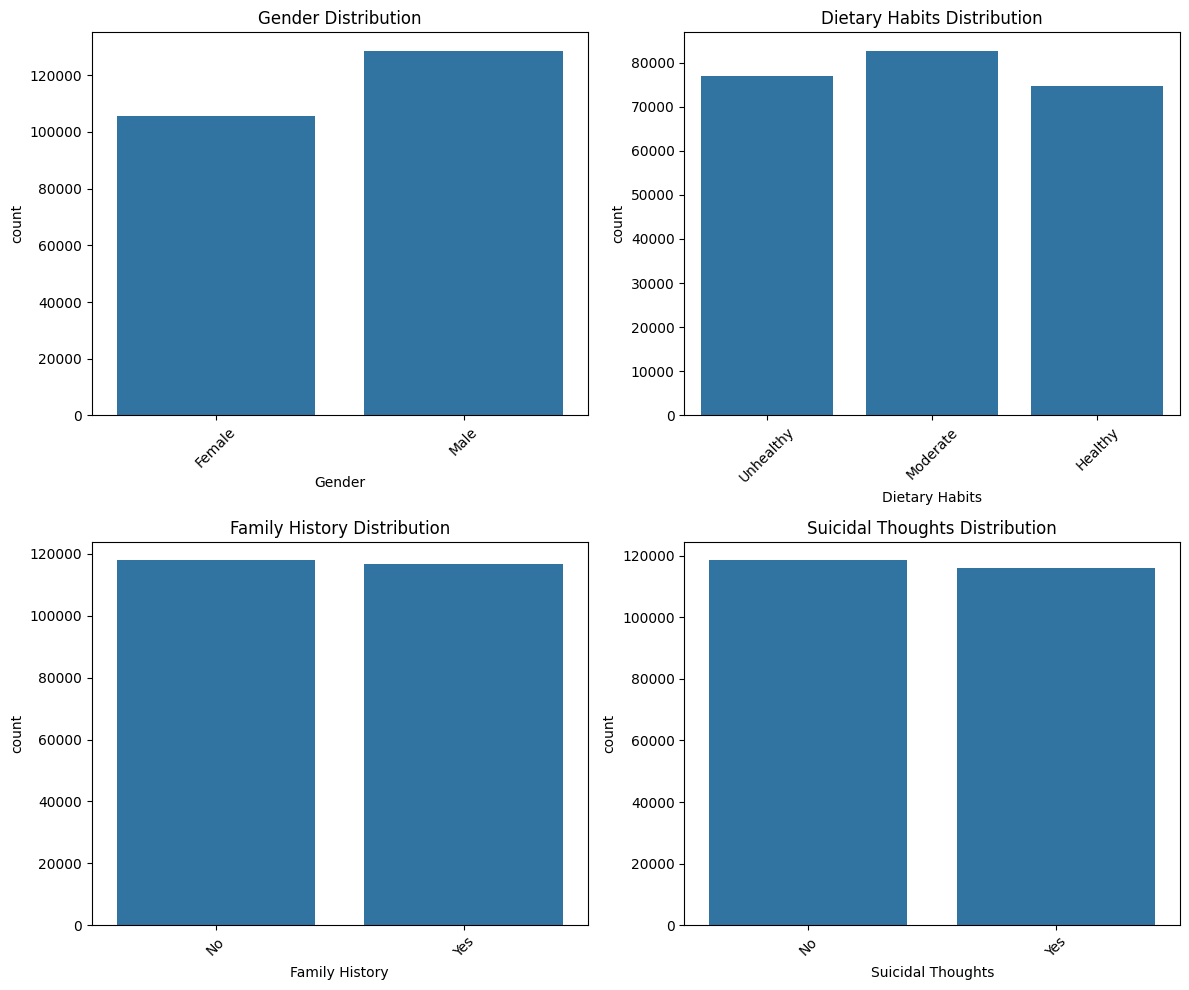

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to plot and the tick labels
categorical_columns = ['Gender', 'Dietary Habits', 'Family History', 'Suicidal Thoughts']
custom_tick_labels = {
    'Gender': ['Female', 'Male'],
    'Dietary Habits': ['Unhealthy', 'Moderate', 'Healthy'],
    'Family History': ['No', 'Yes'],
    'Suicidal Thoughts': ['No', 'Yes']
}

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over the columns and corresponding axes
for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xticklabels(custom_tick_labels[column], rotation=45)  # Set custom tick labels

# Adjust layout
plt.tight_layout()
plt.show()

Text(30.47283950617284, 0.5, 'Depression')

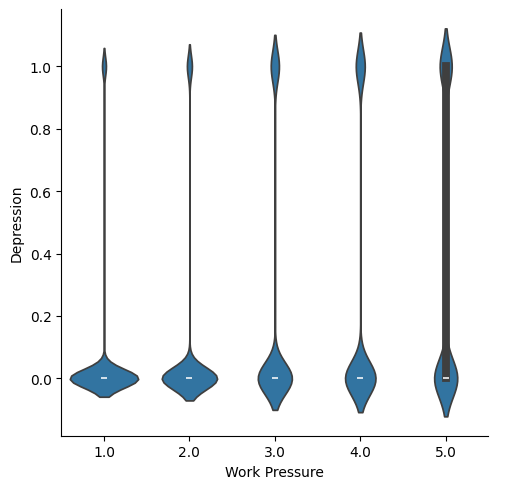

In [168]:
temp_df = df.copy()
temp_df["Depression"] = train_y
temp_df = temp_df[temp_df['Depression'].notna()]
sns.catplot(
    y="Depression",
    x="Work Pressure",
    data=temp_df,
    kind="violin"
)
plt.xlabel("Work Pressure")
plt.ylabel("Depression")

### Feature Engineering

#### Impute Missing Data

In [169]:
numerical_cols = ["Gender", "Age", "Work Pressure", "Job Satisfaction", "Sleep Duration", "Dietary Habits", "Suicidal Thoughts", "Work/Study Hours", "Financial Stress", "Family History"]
categorical_cols = ["Profession", "Degree", "Desk Job"]

In [170]:
from sklearn.impute import SimpleImputer

numerical_imputer = SimpleImputer(strategy="median")
categorical_imputer = SimpleImputer(strategy="most_frequent")

df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

In [171]:
df["Desk Job"]

0         False
1         False
2         False
3         False
4          True
          ...  
234495    False
234496    False
234497    False
234498     True
234499     True
Name: Desk Job, Length: 234500, dtype: object

In [172]:
df["stress"] = df["Work/Study Hours"] / df["Job Satisfaction"] / df["Sleep Duration"]

In [173]:
prof_work_pressure_mean = df.groupby('Profession')['Work Pressure'].mean()
df["prof_work_pressure"] = df["Profession"].map(prof_work_pressure_mean)

In [174]:
prof_job_satis_mean = df.groupby('Profession')['Job Satisfaction'].mean()
df['prof_job_satis'] = df['Profession'].map(prof_job_satis_mean)

In [175]:
df["fin_stress_by_age"] = df["Financial Stress"] / df["Age"]
df["fin_stress_x_age"] = df["Financial Stress"] * df["Age"]

In [176]:
df.drop(["Name", "City"], axis=1, inplace=True)

In [177]:
df = pd.get_dummies(
    df, columns=categorical_cols,
    dtype=int, drop_first=True
)

### Split data into train & test data

In [209]:
from sklearn.model_selection import train_test_split

Y = df["Depression"]
X = df
n_train = train_y.shape[0]
train_x, test_x, train_y, test_y = train_test_split(X.iloc[:n_train, :], train_y, test_size=0.2, random_state=42)

## XGBoost

In [210]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

SEED = 42

def objective(trial):
    param = {
        "n_estimator": trial.suggest_int("n_estimator", 50, 500),
        "max_depth": trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
        'random_state': SEED,
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'objective': 'binary:logistic',
        'enable_categorical': True
    }
    model = XGBClassifier(**param)
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    accuracy = accuracy_score(y_true=test_y, y_pred=y_pred)
    return accuracy

In [211]:
import optuna
N_TRIALS = 10 

study = optuna.create_study(direction="maximize")
study.optimize(
    objective,
    n_trials=N_TRIALS
)
best_xgb_params = study.best_params

[I 2024-11-16 17:43:23,341] A new study created in memory with name: no-name-59767ccf-80e8-4cbf-a57e-9c213a8ceff7
/tmp/ipykernel_2490/2676102811.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.1),
/tmp/ipykernel_2490/2676102811.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
/tmp/ipykernel_2490/2676102811.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': tri

In [212]:
best_xgb_params

{'n_estimator': 301,
 'max_depth': 7,
 'learning_rate': 0.08778654522610504,
 'subsample': 0.6371483225651283,
 'colsample_bytree': 0.653835430616418,
 'gamma': 1.5786607021519021,
 'reg_alpha': 0.0008395276405935529,
 'reg_lambda': 0.06910790716112347}

In [213]:
trial = study.best_trial
print(trial.value)
for key, value in trial.params.items():
    print(f"{key} - {value}")

0.818407960199005
n_estimator - 301
max_depth - 7
learning_rate - 0.08778654522610504
subsample - 0.6371483225651283
colsample_bytree - 0.653835430616418
gamma - 1.5786607021519021
reg_alpha - 0.0008395276405935529
reg_lambda - 0.06910790716112347


## CATBoost

In [220]:
from catboost import CatBoostClassifier

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'depth': trial.suggest_int('depth', 3, 12),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'random_strength': trial.suggest_float('random_strength', 0, 1),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'loss_function': 'Logloss',
        'eval_metric': 'Accuracy',
        'logging_level': 'Silent',
        'random_seed': SEED,
    }
    model = CatBoostClassifier(**params)
    model.fit(train_x, train_y, eval_set=(test_x, test_y), early_stopping_rounds=50, verbose=0)
    preds = model.predict(test_x)
    accuracy = accuracy_score(test_y, preds)
    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=N_TRIALS)
best_catb_params = study.best_params
print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject